## Projet python for data analysis
Thomas CULINO & Zachary CHENOT

#### Data importation

In [449]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

In [450]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Explaination of each variable 

**Gender** : gender of the person<br>
**Age** : age of the person<br>
**Height** : height of the person<br>
**Weight** : weight of the person<br>
**family_history_with_overweight** : if the person has someone in his family who was in overweight<br>
**FAVC** : if the person eats caloric food frequently<br>
**FCVC** : if the person eats vegetables in his meals<br>
**NCP** : number of meals a day<br>
**CAEC** : if the person eats between meals<br>
**SMOKE** : if the person smokes<br>
**CH2O** : the quantity of water the person drinks daily<br>
**SCC** : if the person monitors the calories they eat daily<br>
**FAF** : frequence of physical activity in a week<br>
**TUE** : how long the person spends daily on technological devices<br>
**CALC** : frequency of drinking alcohol<br>
**MTRANS** : Means of transport majoritarly used by the person<br>
**NObeyesdad** : target variables which corresponds to the BMI (Body Mass Index)<br>

In [451]:
#We convert non-quantitative variables to type "category"
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [452]:
#On convertit les variables float au int le plus proche
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

for col in columns:
    df[col] = round(df[col]).astype('int')  

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [453]:
df.shape

(2111, 17)

In [454]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.345968,0.093305,26.191172,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,3.000000,2.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
Gender                            2111 non-null category
Age                               2111 non-null float64
Height                            2111 non-null float64
Weight                            2111 non-null float64
family_history_with_overweight    2111 non-null category
FAVC                              2111 non-null category
FCVC                              2111 non-null int32
NCP                               2111 non-null int32
CAEC                              2111 non-null category
SMOKE                             2111 non-null category
CH2O                              2111 non-null int32
SCC                               2111 non-null category
FAF                               2111 non-null int32
TUE                               2111 non-null int32
CALC                              2111 non-null category
MTRANS                            2111 non-null category

#### Ploting the data

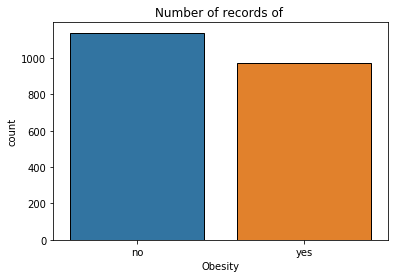

In [358]:
temp = []
for elem in df['NObeyesdad']:
    temp.append('yes') if 'Obesity' in elem else temp.append('no')

df['Obesity'] = temp

plt.figure(figsize=(6,4))

sns.countplot(x=df['Obesity'], data=df, edgecolor="black")

plt.title("Number of records of ")
plt.show()
df = df.drop('Obesity', axis=1)

In [517]:
#Interractive plot representing the history of the family with overweight according to the following tree structure :
#Weight categories--> Gender --> family history with overweight
fig = px.sunburst(df, path=['NObeyesdad', 'Gender', 'family_history_with_overweight'])
fig.show()

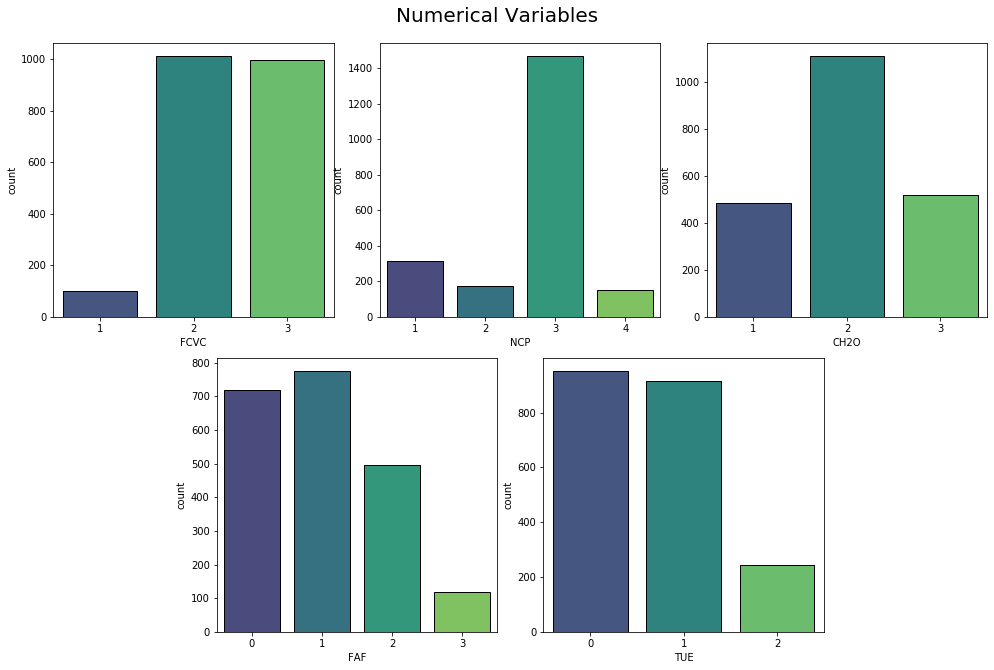

In [360]:
columns = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

axes = [ax1, ax2, ax3, ax4, ax5]
for i in range(len(axes)):
    sns.countplot(df[columns[i]],ax=axes[i], palette="viridis", edgecolor="black") 
    
plt.suptitle("Numerical Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()

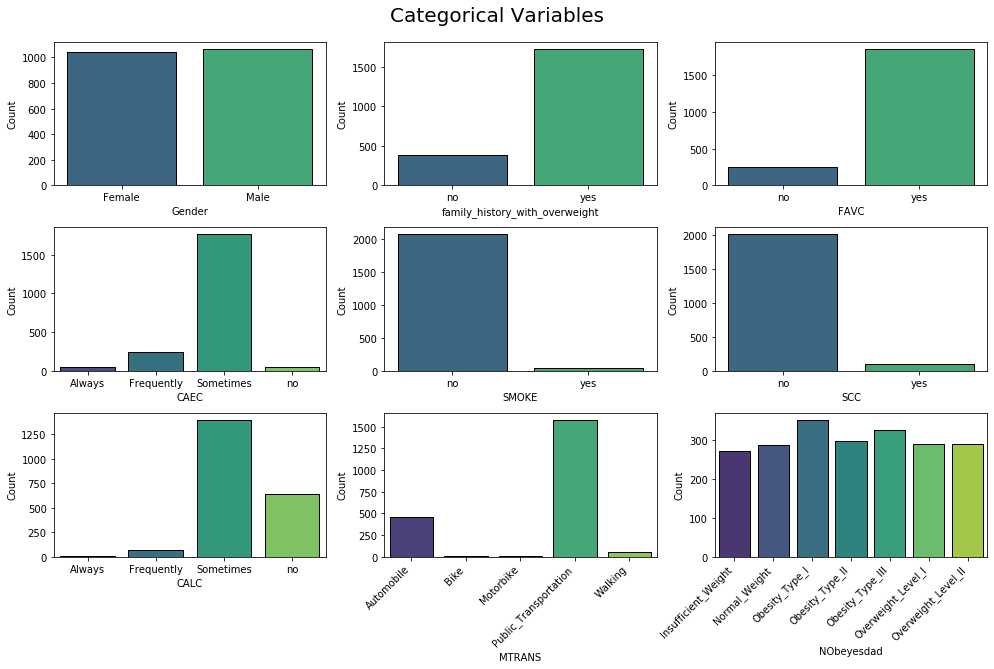

In [361]:
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    
    if col=="MTRANS":
        chart = sns.countplot(df[col],ax=subplot, palette="viridis", edgecolor="black")
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=chart.get_xticklabels())
        #plt.xticks(rotation=45)        
        subplot.yaxis.label.set_text("Count")
    elif col=="NObeyesdad":
        chart = sns.countplot(df[col],ax=subplot, palette="viridis", edgecolor="black")
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=chart.get_xticklabels())  
        subplot.yaxis.label.set_text("Count")
    else:
        sns.countplot(df[col],ax=subplot, palette="viridis", edgecolor="black")  
        subplot.yaxis.label.set_text("Count")
        
# show figure & plots
fig.suptitle("Categorical Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()


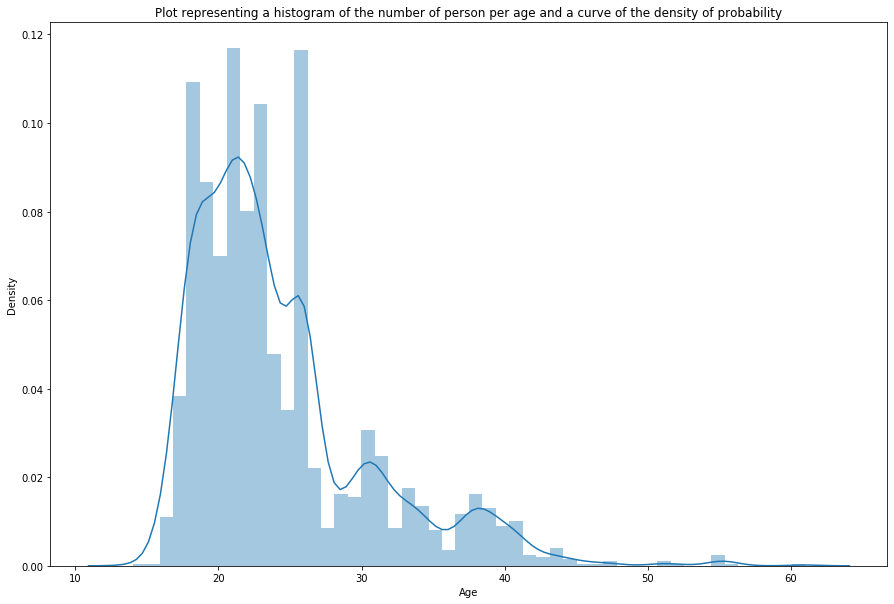

In [362]:
plt.figure(figsize=(15,10))
sns.distplot(df.Age, kde=True)
plt.ylabel('Density')
plt.title("Plot representing a histogram of the number of person per age and a curve of the density of probability")
plt.show()

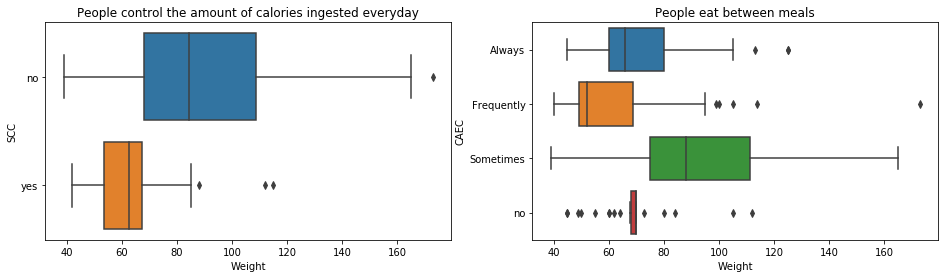

In [479]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SCC', data = df).set_title("People control the amount of calories ingested everyday")
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CAEC', data = df).set_title("People eat between meals")
plt.show()

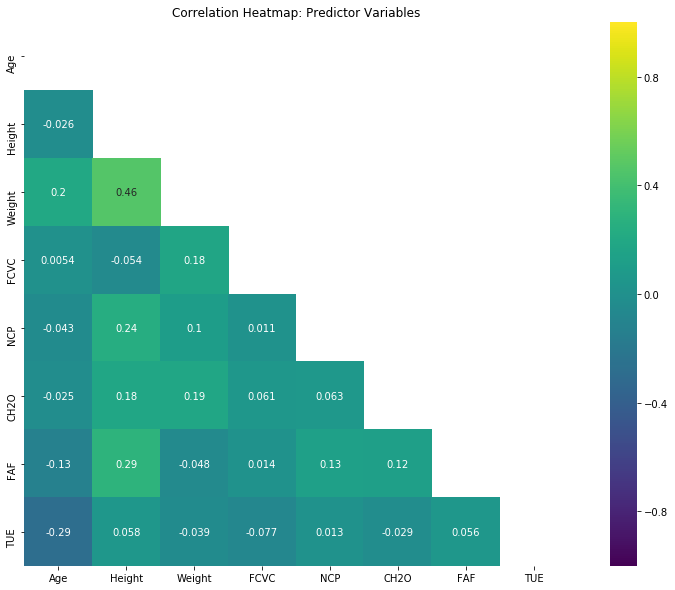

In [365]:
plt.figure(figsize=(15, 10))

# correlation data matrix
matrix = np.triu(df.corr())

plt.title("Correlation Heatmap: Predictor Variables")

sns.heatmap(df.corr(), 
                 mask=matrix,
                 annot = True,                 
                 cmap="viridis", 
                 vmin=-1, vmax=1,                 
                 square="True")


plt.show()

## PARTIE ML

In [456]:
df_prep = df.copy()
df_prep.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [457]:
columns_to_remove = ["Gender","Age","family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS"]
df_prep = df_prep.drop(columns=columns_to_remove)
df_prep.head()

,Height,Weight,NObeyesdad
0,1.62,64.0,Normal_Weight
1,1.52,56.0,Normal_Weight
2,1.80,77.0,Normal_Weight
3,1.80,87.0,Overweight_Level_I
4,1.78,89.8,Overweight_Level_II


In [458]:
X = df_prep.drop(columns=["NObeyesdad"])

y = df_prep['NObeyesdad'] 

In [459]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [460]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2000)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy with Scaled Data:", scaled_accuracy)
        print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
        print("---------------------------------------------------------------         \n")

In [461]:
run_models(X_train, y_train, X_test, y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.96057
Accuracy with Scaled Data: 0.95899

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.97      0.98      0.97        92
      Normal_Weight       0.93      0.92      0.93        77
     Obesity_Type_I       0.95      0.98      0.97       114
    Obesity_Type_II       0.97      0.98      0.97        85
   Obesity_Type_III       1.00      0.99      0.99        92
 Overweight_Level_I       0.94      0.93      0.94        89
Overweight_Level_II       0.96      0.93      0.95        85

           accuracy                           0.96       634
          macro avg       0.96      0.96      0.96       634
       weighted avg       0.96      0.96      0.96       634

---------------------------------------------------------------         

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.9353

### Hyperparameters tuning

In [462]:
from sklearn.model_selection import GridSearchCV

def hyper_tune(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,y_train)
    y_pred_scaled = search.predict(X_test_scaled)
    
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_scaled, target_names=target_names))
    

#### KNN

In [463]:
# Number of neighbors
n_neighbors = [int(x) for x in range(4, 15)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune('KNN', KNeighborsClassifier(), parameters)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
Accuracy Score = 0.94
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.98      0.97        92
      Normal_Weight       0.92      0.87      0.89        77
     Obesity_Type_I       0.95      0.96      0.95       114
    Obesity_Type_II       0.94      0.95      0.95        85
   Obesity_Type_III       0.99      0.98      0.98        92
 Overweight_Level_I       0.91      0.92      0.92        89
Overweight_Level_II       0.94      0.94      0.94        85

           accuracy                           0.94       634
          macro avg       0.94      0.94      0.94       634
       weighted avg       0.94      0.94      0.94       634



##### Random Forest

In [464]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(10, 200,10)]
# Criterion
criterion = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 100, 10)]
# The minimum number of samples required to be at a leaf node
min_sample_leaf = [int(x) for x in range(10, 100, 10)]

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
               #'min_samples_leaf': min_sample_leaf,     the accuracy is worse with min_samples_leaf instead of n_estimators
               'max_depth':max_depth          
               }


hyper_tune('Random Forest', RandomForestClassifier(), parameters)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits
Accuracy Score = 0.96
{'criterion': 'gini', 'max_depth': 40, 'n_estimators': 40}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.97      0.98      0.97        92
      Normal_Weight       0.92      0.91      0.92        77
     Obesity_Type_I       0.95      0.98      0.97       114
    Obesity_Type_II       0.98      0.98      0.98        85
   Obesity_Type_III       1.00      1.00      1.00        92
 Overweight_Level_I       0.91      0.92      0.92        89
Overweight_Level_II       0.96      0.91      0.93        85

           accuracy                           0.96       634
          macro avg       0.96      0.95      0.95       634
       weighted avg       0.96      0.96      0.96       634



##### Decision Tree

In [465]:
# Criterion
criterion = ['gini','entropy']
# Splitter
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 100, 10)]
# The minimum number of samples required to be at a leaf node
min_sample_leaf = [int(x) for x in range(10, 100, 10)]

parameters = {'max_depth': max_depth,
              'min_samples_leaf': min_sample_leaf,
              'criterion':criterion
               }


hyper_tune('Random Forest', DecisionTreeClassifier(), parameters)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Accuracy Score = 0.92
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.99      0.97      0.98        92
      Normal_Weight       0.88      0.83      0.85        77
     Obesity_Type_I       0.95      0.91      0.93       114
    Obesity_Type_II       0.95      0.96      0.96        85
   Obesity_Type_III       1.00      0.98      0.99        92
 Overweight_Level_I       0.79      0.91      0.84        89
Overweight_Level_II       0.88      0.85      0.86        85

           accuracy                           0.92       634
          macro avg       0.92      0.92      0.92       634
       weighted avg       0.92      0.92      0.92       634



#### Feature Importance with Random Forest

In [466]:
# Create Decision Tree classifer object with optimized parameters
clf = RandomForestClassifier(criterion='gini',
              n_estimators=30,
              max_depth = 70)

# Train Decision Tree Classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

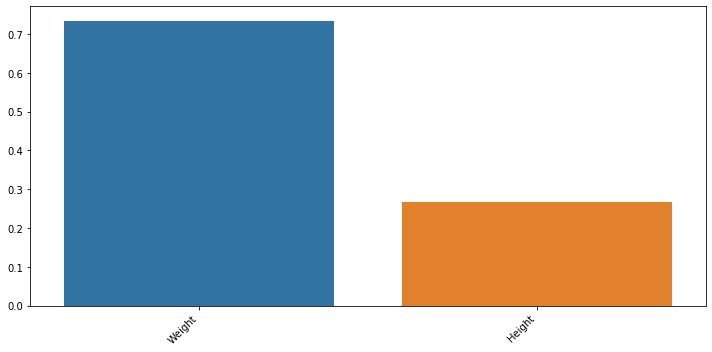


Best Features:
Variable: Weight               Importance: 0.73
Variable: Height               Importance: 0.27


In [467]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

fig = plt.figure(figsize=(10, 5))
sns.barplot(x=feature_imp.index, y=feature_imp)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

# create features list
features_list = X.columns
features_list = features_list.tolist()

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print("\nBest Features:")
display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

## Exploring Two Category Targert Variable
### Data Prep
Here we try classifying by using only two categories Obesity or Not Obesity. 

In [468]:
# map values 
weight_cat = { 'Normal_Weight':0, 'Overweight_Level_I':0,
               'Overweight_Level_II':0, 'Obesity_Type_I':1,
               'Obesity_Type_II':1, 'Obesity_Type_III':1, 'Insufficient_Weight':0}

# map values
df_prep['Obesity'] = df_prep['NObeyesdad'].map(weight_cat)

In [469]:
# Features
X = df_prep.drop(columns=["NObeyesdad","Obesity"])

# Target variable
y = df_prep['Obesity'] 

In [470]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Scaled version of X train and X test
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Random Forest

In [471]:
n_estimators = [int(x) for x in range(10, 200,10)]

criterion = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 100, 10)]

target_names = ['Not Obese', 'Obese']

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth
               }

hyper_tune('Random Forest', RandomForestClassifier(), parameters, target_names=target_names)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits
Accuracy Score = 1.00
{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 40}

Classification Report:
               precision    recall  f1-score   support

   Not Obese       0.99      1.00      1.00       343
       Obese       1.00      0.99      0.99       291

    accuracy                           1.00       634
   macro avg       1.00      1.00      1.00       634
weighted avg       1.00      1.00      1.00       634



### Feature Importance with Random Forest

In [472]:
clf = RandomForestClassifier(criterion='gini',
               n_estimators=150,
              max_depth = 20)

clf = clf.fit(X_train_scaled,y_train)

y_pred = clf.predict(X_test_scaled)

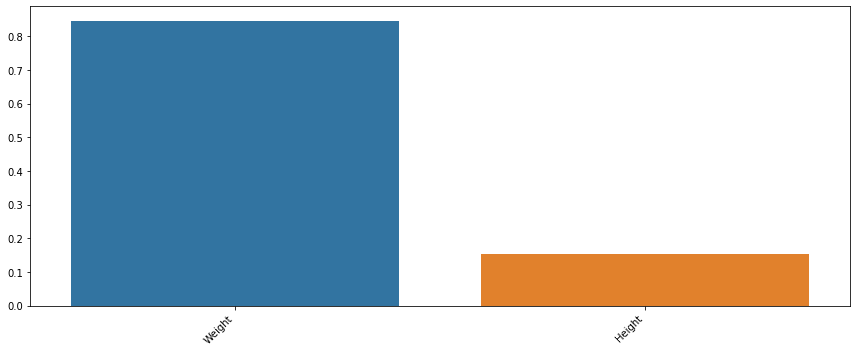


Best Features:
Variable: Weight               Importance: 0.85
Variable: Height               Importance: 0.15


In [473]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

fig = plt.figure(figsize=(12, 5))
sns.barplot(x=feature_imp.index, y=feature_imp)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

features_list = X.columns
features_list = features_list.tolist()
importances = list(clf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
print("\nBest Features:")
display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]